# 1: Introducción a la programación y bases de datos.

## Primero algunas definiciones

**¿Qué es una base de datos?**  

Es una herramienta para recopilar y organizar información. Las bases de datos pueden almacenar información sobre personas, productos, pedidos u otras cosas. Muchas bases de datos comienzan como una lista en una hoja de cálculo o en un programa de procesamiento de texto. A medida que la lista aumenta su tamaño, empiezan a aparecer redundancias e inconsistencias en los datos. Cada vez es más difícil comprender los datos en forma de lista y los métodos de búsqueda o extracción de subconjuntos de datos para revisión son limitados. Una vez que estos problemas comienzan a aparecer, una buena idea es transferir los datos a una base de datos creada con un sistema de administración de bases de datos (DBMS), como Access, MySQL, SQL Server, MariaDB.  

Tomado de: https://support.microsoft.com/es-es/office/conceptos-b%C3%A1sicos-sobre-bases-de-datos-a849ac16-07c7-4a31-9948-3c8c94a7c204#__toc257378454


![ciclo_vida](./images/ciclo-datos.png)

**¿Qué es programar?**  

La programación, o codificación, es el proceso de emitir una serie de órdenes que un ordenador puede entender y ejecutar para realizar una tarea. Hoy en día, casi todas las investigaciones con algún aspecto cuantitativo implican programación.

Imaginemos que un ordenador es como un genio especialmente travieso: si nuestras instrucciones no son totalmente inequívocas, el ordenador no hará lo que le pedimos. Por eso escribimos nuestro código, nuestra lista de instrucciones para el ordenador, de forma muy explícita, para asegurarnos de que escribimos lo que queríamos decir y de que el ordenador lo hará de la forma prevista. Pero, al igual que un genio, si consigues que las instrucciones sean las correctas, puedes crear cosas mágicas *(Turrell, 2022)*.

![Learning Curve](https://assets.cdn.prod.twilio.com/images/V4mA60vWZWNuE7Mtjq31kUsj6xVMX6KKiECduJ1GE_7uFs.width-800.png)

## 1.1. Introducción a los datos y su importancia

En los últimos años, la ciencia de los datos se ha convertido en una herramienta de negocios esencial. El acceso a cantidades masivas de datos —gracias a la informática avanzada y el "internet de las cosas"— permite que hoy en día las empresas puedan medir todos los aspectos de sus operaciones hasta el más mínimo detalle. Pero muchos directores de empresa, desbordados por el continuo aluvión de indicadores, vacilan en implicarse en un proceso que consideran de índole técnica.

A quién le cabe en la cabeza que un director de finanzas vaya al director ejecutivo y le diga:
- "Yo francamente no sé cómo leer un balance, pero tengo a alguien en mi equipo que lo sabe hacer muy bien"

Lo echaríamos de la sala a carcajadas. Y sin embargo, yo conozco cantidad de gente en otras disciplinas, como por ejemplo, el marketing, que, sin pensarlo dos veces, irían al director ejecutivo y le dirían:
- "Esto de la analítica es muy complicado. No lo entiendo del todo. Pero he reunido un equipo de auténticos genios de la analítica que nos van a propulsar al siguiente nivel".

Yo creo que ésta es una respuesta que ya no es aceptable.

Tomado de: https://insight.kellogg.northwestern.edu/es/article/a-leaders-guide-to-data-analytics


---
En resumen, saber como manejar datos mediante la programación nos permite:  
- Automatizar procesos: realizar el trabajo de varias personas en unas cuantas (a  veces muchas) líneas de código.
- Modelar: abstraer un fenómeno del mundo real en una expresión matemática/estadística que nos permita entender y predecir dicho fenómeno.
- Predecir: a partir del modelo, podemos generar proyecciones que nos ayuden a maximizar un beneficio o minimizar un riesgo.
---

Además, los lenguajes que aprenderemos se encuentran entre los más demandados.

![prog_lang](https://www.uplers.com/wp-content/uploads/2022/03/in-demand-programming-languages.png)

Tomado de: [Stack Overflow](https://insights.stackoverflow.com/survey/2021#most-popular-technologies-language)

### Veamos un ejemplo

Se estima que hoy en día la cantidad de datos que el mundo genera es de al rededor de 23 *zettabytes*!

> ¿Qué es un zettabyte?

Imaginemos que deseamos hacer un breve reporte de la tendencia de la cantidad de datos generados en los últimos años, generar un modelo que se ajuste a las observaciones, predecir lo que sucederá hasta el 2027, enviar un boletín a una lista de destinatarios.

*Por ahora, no se enfoquen en el código, solo en el proceso.*

1. Inicializamos nuestro ambiente

In [1]:
import pandas as pd
import numpy as np
import requests

import win32com.client as win32
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

2. Extracción  de datos (webscrapping)

In [2]:
url = requests.get('https://explodingtopics.com/blog/data-generated-per-day')
df  = pd.read_html(url.text)[1][[0,1]]
df.columns = df.iloc[0]
df = df.iloc[1:]


In [3]:
df

,Year,Data Generated
1,2010,2 zettabytes
2,2011,5 zettabytes
3,2012,6.5 zettabytes
4,2013,9 zettabytes
5,2014,12.5 zettabytes
6,2015,15.5 zettabytes
7,2016,18 zettabytes
8,2017,26 zettabytes
9,2018*,33 zettabytes
10,2019*,41 zettabytes


3. Limpieza de datos

In [4]:
df['Year'] = df['Year'].str[0:4].astype(int)
df = df[df['Year'] <= 2023]
df['Data Generated'] = df['Data Generated'].str.split(' ', expand=True)[0].astype(float)
df.set_index('Year', inplace=True, drop=True)


C:\Users\Alejo\AppData\Local\Temp\ipykernel_18628\2687451052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data Generated'] = df['Data Generated'].str.split(' ', expand=True)[0].astype(float)


4. Análisis exploratorio

In [5]:
df

,Data Generated
Year,
2010,2.0
2011,5.0
2012,6.5
2013,9.0
2014,12.5
2015,15.5
2016,18.0
2017,26.0
2018,33.0


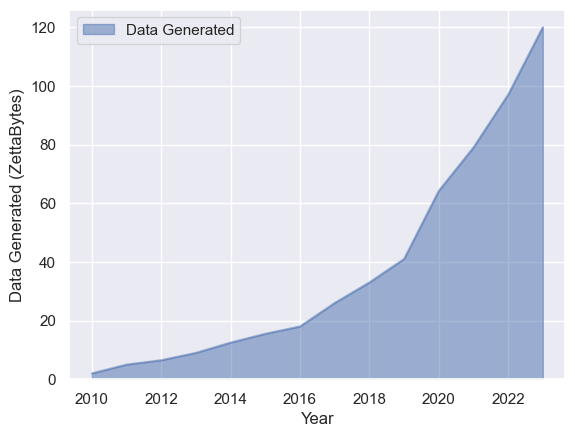

In [6]:
df.plot.area(alpha=0.5)
plt.ylabel('Data Generated (ZettaBytes)')
plt.legend(title='')
plt.show()

5. Modelamiento

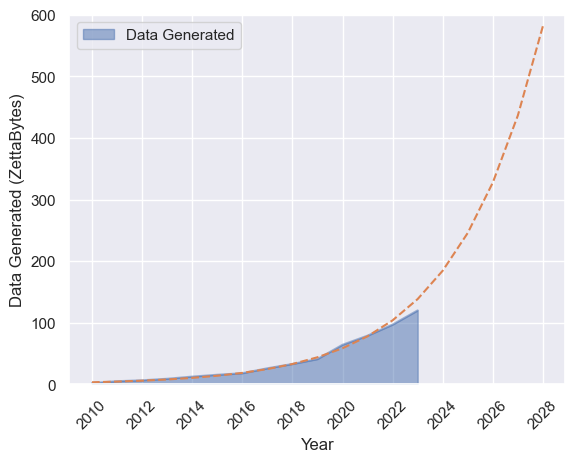

In [7]:
# fit line to data
x = df.index.values
y = df['Data Generated'].values

m, b = np.polyfit(x, np.log(y), 1)

# plot data
df.plot.area(alpha=0.5)
plt.ylabel('Data Generated (ZettaBytes)')
plt.legend(title='')
x_pred = np.arange(2010, 2029)
y_pred = np.exp(m*x_pred + b)
df_pred = pd.DataFrame({'Fcst': y_pred}, index=x_pred)
df_pred = df.merge(df_pred, how='outer', left_index=True, right_index=True)
plt.plot(x_pred, y_pred, label='Fit', linestyle='--')
plt.xticks(np.arange(2010, 2029, 2), rotation=45)

plt.ylim(0, 600)
plt.savefig('./images/data_generated_fit.png', dpi=100)
plt.show()


6. Reportería (BI)

In [8]:
mail = win32.Dispatch('outlook.application').CreateItem(0)
mail.Bcc = open('listado.txt').read().replace('\n', '; ')
mail.Subject = f'Cantidad de datos generados por año'
mail.HTMLBody = fr'''
<html> <head></head><body>
  Hola tod@s, <br>
  <p>Les comparto la cantidad de datos generados por año:</p> <br>
  {df_pred.reset_index().to_html(index=False)}<br>
  <img src="https://raw.githubusercontent.com/alejo-acosta/pmdb-material/master/images/data_generated_fit.png">
  <br>
  Fuente: <a href="https://explodingtopics.com/blog/data-generated-per-day">Exploding Topics</a>
  <br><p>Saludos,</p>
<p>Alejo</p></body></html>
'''
if True: mail.Send()


## 1.2. Elementos de una base de datos  

Primero, algunas definiciones más técnicas sobre una base de datos:  

![Base de datos](https://www.csestack.org/wp-content/uploads/2017/08/Difference-Between-Database-and-Database-Management-System.png)  
Nota: APP=application, API=application programming interface.  
Tomado de: [csestack](https://www.csestack.org/difference-database-database-management-system-dbms/).

- Tabla: es análogo a una hoja de cálculo ya que los datos se almacenan en filas y columnas.
    - Las **filas**, también llamados **registros**, representan la unidad de observación de la cual queremos almacenar información.
    - Las **columnas**, también llamados **campos**, representan las características de dicha unidad de observación. Cada campo solo podrá contener un tipo de datos y usualmente uno (o más campos) representan una clave principal, es decir un identificador único que no podrá repetirse.

> ### Tipos de datos más comunes
> - INT, TINYINT, BIGINT: Número entero.
> - FLOAT: Número decimal.
> - CHAR, VARCHAR, TEXT, STR: texto (string).
> - BINARY, BIT: variable dicotómica (0/1).
> - DATE, TIME: fecha u hora.

- Formulario: es la interfaz mediante la cual se ingresan los datos.
- Informe: se usan para dar formato a los datos, resumirlos y presentarlos.
    - Vista: es una tabla virtual, no existe físicamente dentro de la base de datos.
- Consulta: sirven para realizar muchas funciones en una base de datos. La más común es recuperar datos específicos de las tablas. 

Tomado de: [Conceptos básicos sobre bases de datos.](https://support.microsoft.com/es-es/office/conceptos-b%C3%A1sicos-sobre-bases-de-datos-a849ac16-07c7-4a31-9948-3c8c94a7c204)



> **Ejercicio:** identifiquemos algunos de los elementos revisados para los siguientes casos.
> - Una base de datos de clientes.
> - Una base de datos de facturación.
> - Una base de datos notas de alumnos.

## 1.3. Introducción al lenguaje de consultas SQL

En éste punto, vamos a comenzar a programar. Para ello usaremos una herramienta en línea [www.sql-practice.com](https://www.sql-practice.com/).

Otro recurso valioso para aprender el lenguaje es [w3schools](https://www.w3schools.com/sql/).

SQL (standard query language) es un lenguaje para almacenar, manipular y recuperar datos en bases de datos.

A pesar de que es un lenguaje "estándar" existen variantes que a veces complican, el que veremos aquí aprenderemos la variante más común que sirve en: MySQL, SQL Server, MS Access, Oracle, Sybase, Informix, Postgres.

## 1.4. Sintaxis básica de SQL para consultas

La sintaxis básica de SQL para realizar consultas tiene 6 elementos:
```sql
SELECT campo_1, campo_2, campo_3  
FROM tabla_1
JOIN tabla_2
WHERE condición_1, condición_2, condición_3 
GROUP BY grupo_1, grupo_2, grupo_3
ORDER BY columna_1, columna_2, columna_3  
```
De los cuales los dos primeros son imprescindibles. No puede haber una consulta sin un *SELECT* y un *FROM*.

> SQL es indiferente a mayúsculas y minúsculas (case insensitive)

Se puede usar un * para seleccionar todos los campos, y el comando LIMIT para seleccionar los n primeros registros.
```sql
SELECT *  
FROM tabla_1
LIMIT 10
```


Veamos algunos ejemplos utilizando la base de hospitales en [www.sql-practice.com](https://www.sql-practice.com/).

Seleccionar los 10 primeros pacientes:
```sql
SELECT *
FROM patients
LIMIT 10
```



Seleccionar los 10 primeros pacientes de género masculino:
```sql
SELECT * FROM patients WHERE gender='M' LIMIT 10
```



Seleccionar los 10 primeros pacientes que pesan entre 100 y 120:
```sql
SELECT * FROM patients WHERE weight>=100 AND weight<=120 LIMIT 10
```



Seleccionar solo campos específicos:
```sql
SELECT patient_id, first_name, last_name FROM patients LIMIT 10
```



Usar aliases para las columnas:
```sql
SELECT
    patient_id AS identificación,
    first_name AS nombre,
    last_name AS apellido
FROM patients
LIMIT 10
```



Podemos resumir las tablas con algunos comandos, por ejemplo:
- Seleccionar elementos únicos:
```sql
SELECT DISTINCT city FROM patients
```


- Realizar operaciones aritméticas:
```sql
SELECT 
    *,
    weight/POWER(height,2)*10000 AS bmi
FROM patients
```



- Realizar cálculos con columnas
```sql
SELECT COUNT(first_name) FROM patients
```
```sql
SELECT AVG(height) FROM patients
```



- Todo ésto se puede hacer agrupando por algun campo:
```sql
SELECT gender, avg(height) from patients group by gender
```



- Unir texto:
```sql
SELECT
CONCAT(first_name, ' ', last_name) as nombre_completo
FROM patients
LIMIT 10  
```



- Extraer pedazos de texto:
```sql
SELECT
SUBSTRING(first_name, 1, 1) as inicial_nombre,
SUBSTRING(last_name, 1, 1) as inicial_apellido
FROM patients
LIMIT 10  
```



- También se puede hacer una consulta dentro de otra consulta:
```sql
SELECT first_name, last_name, height 
FROM patients
WHERE height = (SELECT MAX(height) FROM patients)
```

### Ejercicios consulta SQL



- Seleccionar nombres únicos que comiencen con la letra "C".
- Seleccionar a la persona con mayor peso.
- Obtener una altura promedio por ciudad y ordenarlo.
- ¿Cuál es la proporción de pacientes alérgicos?